<a href="https://colab.research.google.com/github/NotRay-67/DeepLearning/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning model


In [ ]:
#import the necessary packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

## Get the Data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"notray67","key":"0cdf44026e395989f27ebbcd6693d131"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset
!unzip /content/the-oxfordiiit-pet-dataset.zip -d Cat-Dog
print('There are {} images in the dataset'.format(len(glob.glob('/content/Cat-Dog/images/*.jpg'))))

Streaming output truncated to the last 5000 lines.
  inflating: Cat-Dog/images/images/leonberger_82.jpg  
  inflating: Cat-Dog/images/images/leonberger_83.jpg  
  inflating: Cat-Dog/images/images/leonberger_84.jpg  
  inflating: Cat-Dog/images/images/leonberger_85.jpg  
  inflating: Cat-Dog/images/images/leonberger_86.jpg  
  inflating: Cat-Dog/images/images/leonberger_87.jpg  
  inflating: Cat-Dog/images/images/leonberger_88.jpg  
  inflating: Cat-Dog/images/images/leonberger_89.jpg  
  inflating: Cat-Dog/images/images/leonberger_9.jpg  
  inflating: Cat-Dog/images/images/leonberger_90.jpg  
  inflating: Cat-Dog/images/images/leonberger_91.jpg  
  inflating: Cat-Dog/images/images/leonberger_92.jpg  
  inflating: Cat-Dog/images/images/leonberger_93.jpg  
  inflating: Cat-Dog/images/images/leonberger_94.jpg  
  inflating: Cat-Dog/images/images/leonberger_95.jpg  
  inflating: Cat-Dog/images/images/leonberger_96.jpg  
  inflating: Cat-Dog/images/images/leonberger_97.jpg  
  inflating: Ca

In [ ]:
CATS = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']
cats_images = []
dogs_images = []
for img in glob.glob('/content/Cat-Dog/images/*.jpg'):
  if any(cat in img for cat in CATS):
    cats_images.append(img)
  else:
    dogs_images.append(img)
print('There are {} images of cats'.format(len(cats_images)))
print('There are {} images of dogs'.format(len(dogs_images)))

There are 2400 images of cats
There are 4990 images of dogs


In [ ]:
np.random.shuffle(cats_images)
np.random.shuffle(dogs_images)
#split the data into train, validation and test sets
train_d, val_d, test_d = np.split(dogs_images, [int(len(dogs_images)*0.7), int(len(dogs_images)*0.8)])
train_c, val_c, test_c = np.split(cats_images, [int(len(cats_images)*0.7), int(len(cats_images)*0.8)])
train_dog_df = pd.DataFrame({'image':train_d, 'label':'dog'})
val_dog_df = pd.DataFrame({'image':val_d, 'label':'dog'})
test_dog_df = pd.DataFrame({'image':test_d, 'label':'dog'})
train_cat_df = pd.DataFrame({'image':train_c, 'label':'cat'})
val_cat_df = pd.DataFrame({'image':val_c, 'label':'cat'})
test_cat_df = pd.DataFrame({'image':test_c, 'label':'cat'})
train_df = pd.concat([train_dog_df, train_cat_df])
val_df = pd.concat([val_dog_df, val_cat_df])
test_df = pd.concat([test_dog_df, test_cat_df])
print('There are {} images for training'.format(len(train_df)))
print('There are {} images for validation'.format(len(val_df)))
print('There are {} images for testing'.format(len(test_df)))

There are 5173 images for training
There are 739 images for validation
There are 1478 images for testing


## Preprocessing the Images

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
#rescale the images
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)
#convert them into a dataset
trainDataset = trainGenerator.flow_from_dataframe(
dataframe=train_df,
class_mode="binary",
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH) #set the height and width of the images
)
valDataset = valGenerator.flow_from_dataframe(
dataframe=val_df,
class_mode='binary',
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH)
)
testDataset = testGenerator.flow_from_dataframe(
dataframe=test_df,
class_mode='binary',
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH)
)


Found 5173 validated image filenames belonging to 2 classes.
Found 739 validated image filenames belonging to 2 classes.
Found 1478 validated image filenames belonging to 2 classes.


Batch shape:  (32, 224, 224, 3)
Label shape:  (32,)
Label:  1.0


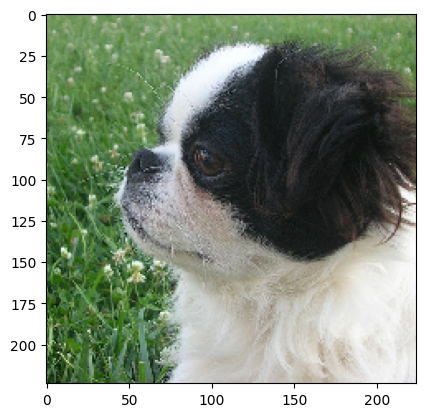

In [ ]:
images, labels = next(iter(testDataset))
print('Batch shape: ', images.shape)
print('Label shape: ', labels.shape)


plt.imshow(images[3])
print('Label: ', labels[3])
#The labels are 1 for dogs and 0 for cats.


Label:  0.0


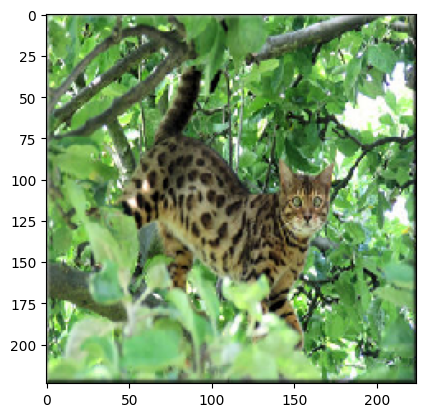

In [ ]:
plt.imshow(images[5])
print('Label: ', labels[5])

## Preparing the model

In [ ]:
model = keras.Sequential([
keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
keras.layers.Conv2D(64, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(128, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(256, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(512, (3, 3), activation='relu'),
keras.layers.GlobalAveragePooling2D(),
keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

## Training the Model

In [ ]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs=15
#train the model
history = model.fit(trainDataset, epochs=epochs, validation_data=(valDataset))

Epoch 1/15
162/162 [==============================] - 40s 186ms/step - loss: 0.6226 - accuracy: 0.6737 - val_loss: 0.6028 - val_accuracy: 0.6752
Epoch 2/15
162/162 [==============================] - 28s 174ms/step - loss: 0.5982 - accuracy: 0.6799 - val_loss: 0.6036 - val_accuracy: 0.6834
Epoch 3/15
162/162 [==============================] - 28s 173ms/step - loss: 0.5878 - accuracy: 0.6861 - val_loss: 0.5961 - val_accuracy: 0.6820
Epoch 4/15
162/162 [==============================] - 26s 163ms/step - loss: 0.5803 - accuracy: 0.6893 - val_loss: 0.5946 - val_accuracy: 0.6861
Epoch 5/15
162/162 [==============================] - 26s 161ms/step - loss: 0.5773 - accuracy: 0.6882 - val_loss: 0.5981 - val_accuracy: 0.6806
Epoch 6/15
162/162 [==============================] - 27s 167ms/step - loss: 0.5675 - accuracy: 0.6969 - val_loss: 0.5767 - val_accuracy: 0.7023
Epoch 7/15
162/162 [==============================] - 26s 160ms/step - loss: 0.5600 - accuracy: 0.7066 - val_loss: 0.5651 - val_ac

## visualize the model's training performance


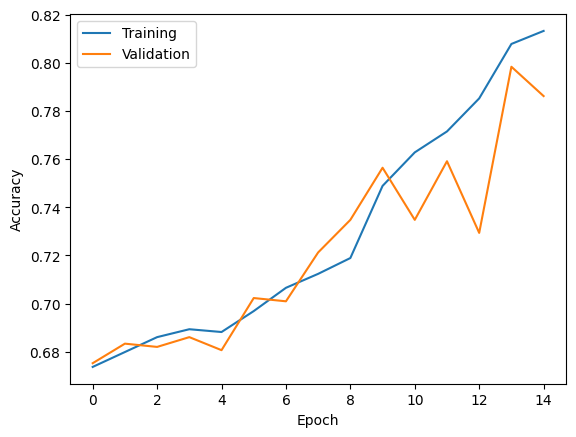

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

## Evaluate the model

In [ ]:
#evaluate the model on the test dataset
loss, acc = model.evaluate(testDataset)

47/47 [==============================] - 6s 131ms/step - loss: 0.4553 - accuracy: 0.7977


Loss: 0.4552854299545288
Accuracy: 0.7976995706558228


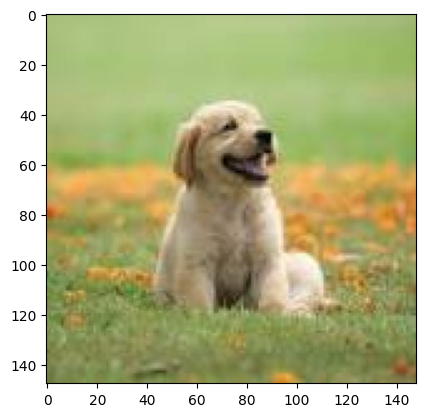

In [ ]:
print('Loss:', loss)
print('Accuracy:', acc)
img = plt.imread('/content/dog_image.jpeg')
plt.imshow(img)